In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import seaborn as sns
%matplotlib inline
import nltk
import numpy as np

In [4]:
emotions = ['fear', 'anger', 'anticipation', 'trust', 'surprise','sadness', 'disgust', 'joy']
class Visulization:
    @staticmethod
    def createSentimentPieChart(tweets,title):
        props = tweets['sentiment'].value_counts(normalize=True)
        #print(props)
        plt.figure()
        plt.pie(props,labels=props.keys(),autopct='%.0f%%',)
        plt.title(title)
        return props

    @staticmethod
    def createEmotionPieChart(tweets,title):
        res = {}
        for emotion in emotions:
            res[emotion] = len(tweets.query(emotion+'==1'));
        print(res)
        plt.figure()
        plt.pie(res.values(),labels=res.keys(),autopct='%.0f%%',)
        plt.title(title)

    @staticmethod
    def createWordCloudForEmotion(tweets,emotion,column,title):
        filtered_tweets = tweets.query(emotion+'==1')

        #tokens = sum(res_map, [])
        # Create a WordCloud object
        wordcloud = WordCloud(mode="RGBA", background_color=None , max_words=1000, height = 400, width = 900, contour_width=3, contour_color='steelblue')
        long_string = Visulization.create_joint_string(filtered_tweets,column)
        # Generate a word cloud
        wordcloud.generate(long_string)
        # Visualize the word cloud
        wordcloud.to_image()
        plt.figure(figsize=(20,15))
        plt.imshow(wordcloud)
        plt.axis('off')
        plt.title(title, fontsize=18, color = 'Orange')
        plt.show()
    @staticmethod
    def create_joint_string(tweets,column):
        res_map = list(map(Visulization.Convert,tweets[column].values))
        long_string = ' '.join(list(map(' '.join,res_map)))
        return long_string
    @staticmethod
    def plot_frequency_chart(info):
        fig, ax = plt.subplots(figsize=(14, 8))
        sns.set_context("notebook", font_scale=1)
        ax = sns.barplot(x=info['x'], y=info['y'], data=info['data'], palette=(info['pal']))
        ax.set_title(label=info['title'], fontweight='bold', size=18)
        plt.ylabel(info['ylab'], fontsize=16)
        plt.xlabel(info['xlab'], fontsize=16)
        plt.xticks(rotation=info['angle'],fontsize=14)
        plt.yticks(fontsize=14)
        plt.tight_layout()
        #plt.savefig('images/' + info['fname'])

        return
    @staticmethod
    def creatNGramsChart(tweets,emotion,title = 'default title',n=3,topCnt = 10):
        filtered_tweets = tweets.query(emotion+'==1')
        assert (n == 2 or n==3)
        long_string = Visulization.create_joint_string(filtered_tweets,'tokens')
        # Get tokens
        tokens = long_string.split(' ')
        if n == 3:
            trigrams = nltk.trigrams(tokens)
        elif n == 2:
            trigrams = nltk.trigrams(tokens)
        df_trigrams = Visulization.get_top_n_grams(trigrams,n,topCnt)
        info = {'data': df_trigrams, 'x': 'Grams', 'y': 'Count',
                'xlab': 'Trigrams', 'ylab': 'Count', 'pal':'viridis',
                'title': title,
                'angle': 40}
        Visulization.plot_frequency_chart(info)

    @staticmethod
    def get_top_n_grams(trigrams, N=3, top_grams = 10):
        grams_str = []
        data = []
        gram_counter = Counter(trigrams)

        for grams in gram_counter.most_common(top_grams):
            gram = ''
            grams_str = grams[0]
            grams_str_count = []
            for n in range(0,N):
                gram = gram + grams_str[n] + ' '
            grams_str_count.append(gram)
            grams_str_count.append(grams[1])
            data.append(grams_str_count)
        df = pd.DataFrame(data, columns = ['Grams', 'Count'])

        return df
    @staticmethod
    def Convert(string):
        # li = list(string.strip('][').split(", "))
        # res = [x.strip('\'\'') for x in li]
        # if string.isnull()    :
        #     return []
        res = list(string.split(" "))
        return res

#Visulization.createSentimentPieChart(tweets,'Sentiment Sample Title')
#Visulization.createEmotionPieChart(tweets,'Emotion Sample Title')
#Visulization.createWordCloudForEmotion(tweets,'fear','nouns','fear word cloud')
#Visulization.createWordCloudForEmotion(tweets,'trust','nouns','trust word cloud')
#Visulization.createWordCloudForEmotion(tweets,'fear','adjectives','fear adjective word cloud')

In [42]:
tweets_putin = pd.read_csv('./processed_dataset/Putin.csv',keep_default_na =False)
tweets_putin.drop_duplicates(subset=['tokens'], inplace=True)
tweets_putin.dropna(inplace=True)
tweets_Zelensky = pd.read_csv('./processed_dataset/Zelensky.csv',keep_default_na =False)
tweets_Zelensky.drop_duplicates(subset=['tokens'], inplace=True)
tweets_Zelensky.dropna(inplace=True)
tweets_Russia = pd.read_csv('./processed_dataset/Russia.csv',keep_default_na =False)
tweets_Russia.drop_duplicates(subset=['tokens'], inplace=True)
tweets_Russia.dropna(inplace=True)
tweets_Ukraine = pd.read_csv('./processed_dataset/Ukraine.csv',keep_default_na =False)
tweets_Ukraine.drop_duplicates(subset=['tokens'], inplace=True)
tweets_Ukraine.dropna(inplace=True)
tweets_UR_War = pd.read_csv('./processed_dataset/Ukraine Russia War.csv',keep_default_na =False)
tweets_UR_War.drop_duplicates(subset=['tokens'], inplace=True)
tweets_UR_War.dropna(inplace=True)

dict = {
    "Putin" : tweets_putin,
    "Zelensky" : tweets_Zelensky,
    "Russia" : tweets_Russia,
    "Ukraine" : tweets_Ukraine,
    "Ukraine Russia War" : tweets_UR_War
};

## Eentiment Detection Result

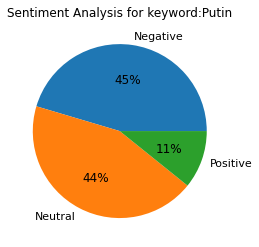

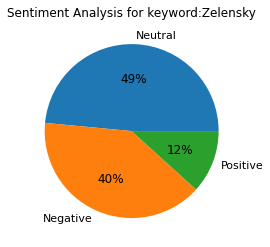

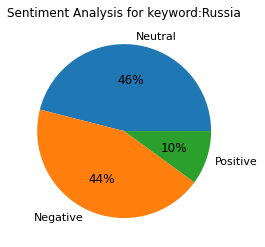

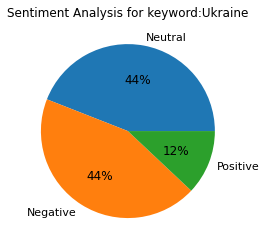

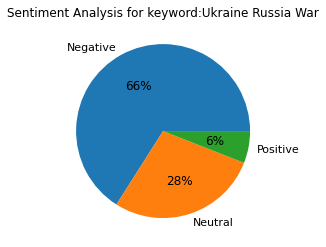

In [46]:
##  sentiment Detection Result

for key in dict.keys():
    Visulization.createSentimentPieChart(dict[key],'Sentiment Analysis for keyword:'+key)

## Emotion Detection Result


{'fear': 6950, 'anger': 4724, 'anticipation': 3907, 'trust': 6179, 'surprise': 1867, 'sadness': 3811, 'disgust': 2348, 'joy': 2771}
{'fear': 4020, 'anger': 2701, 'anticipation': 2648, 'trust': 4289, 'surprise': 1153, 'sadness': 2047, 'disgust': 1128, 'joy': 1916}
{'fear': 6775, 'anger': 4400, 'anticipation': 3725, 'trust': 5814, 'surprise': 1534, 'sadness': 3341, 'disgust': 1803, 'joy': 2391}
{'fear': 8903, 'anger': 5656, 'anticipation': 4751, 'trust': 7237, 'surprise': 2092, 'sadness': 3754, 'disgust': 1754, 'joy': 3402}
{'fear': 7744, 'anger': 2552, 'anticipation': 2138, 'trust': 3381, 'surprise': 812, 'sadness': 1731, 'disgust': 713, 'joy': 1347}


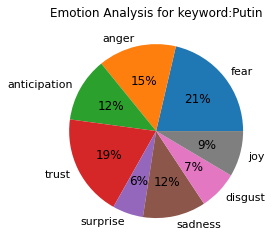

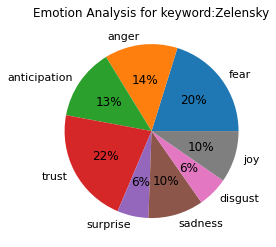

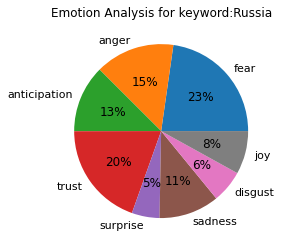

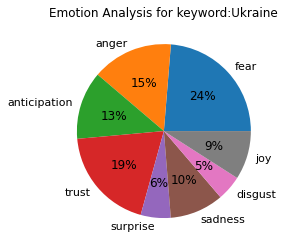

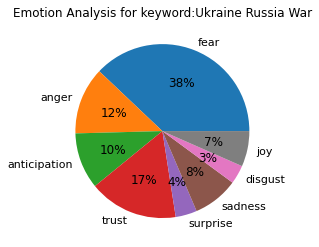

In [44]:
#Emotion Detection Result
for key in dict.keys():
    Visulization.createEmotionPieChart(dict[key],'Emotion Analysis for keyword:'+key)

# Keyword: Putin

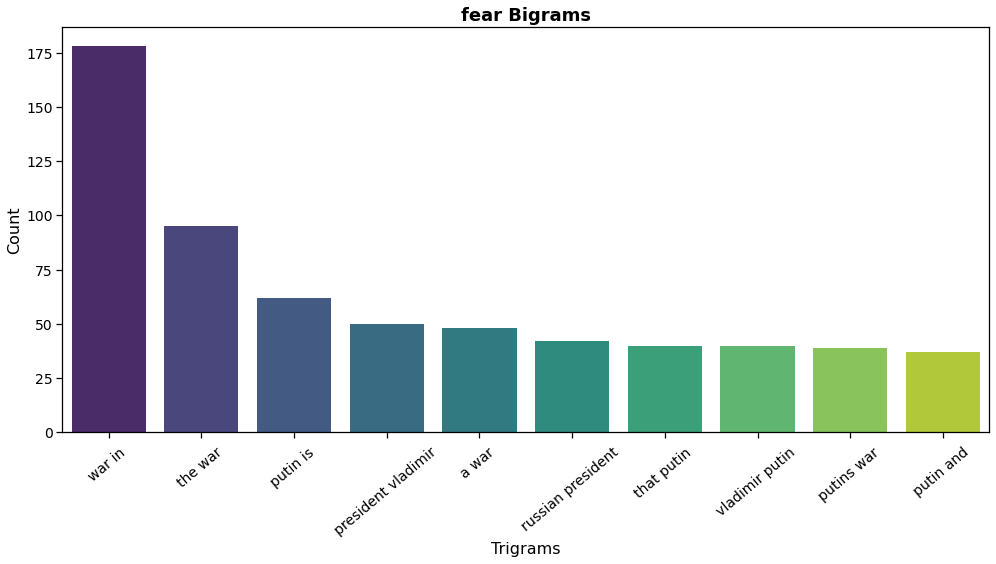

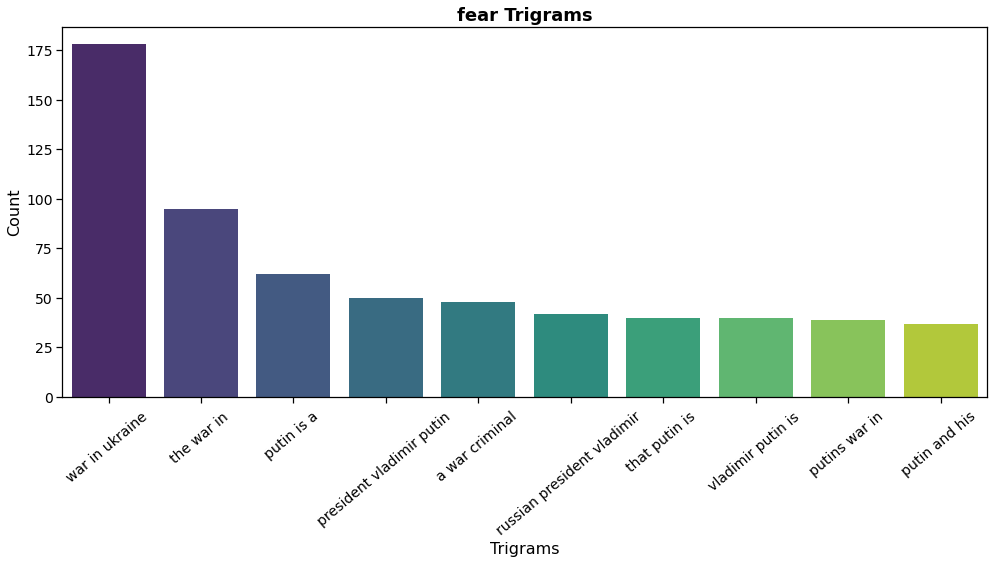

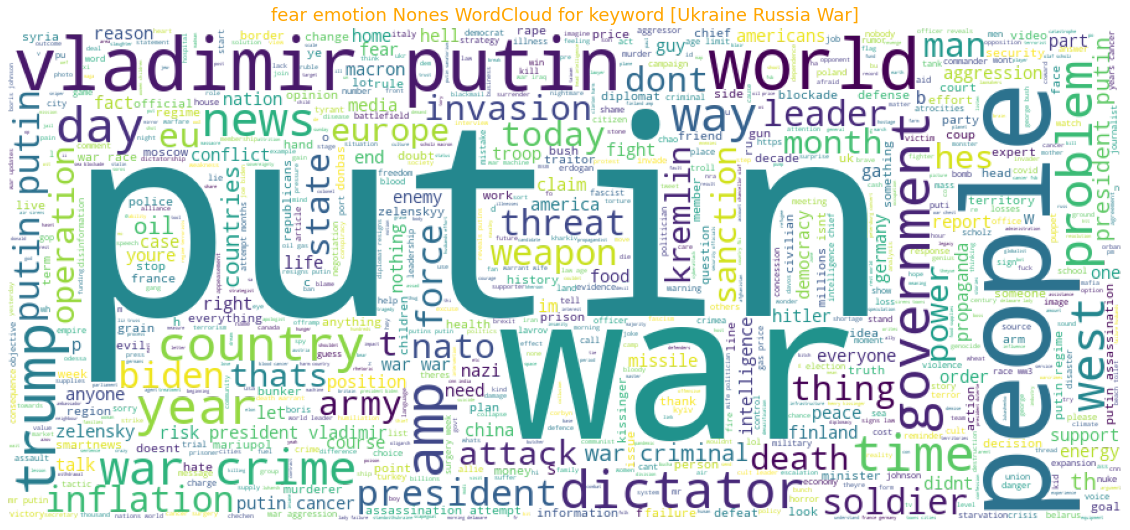

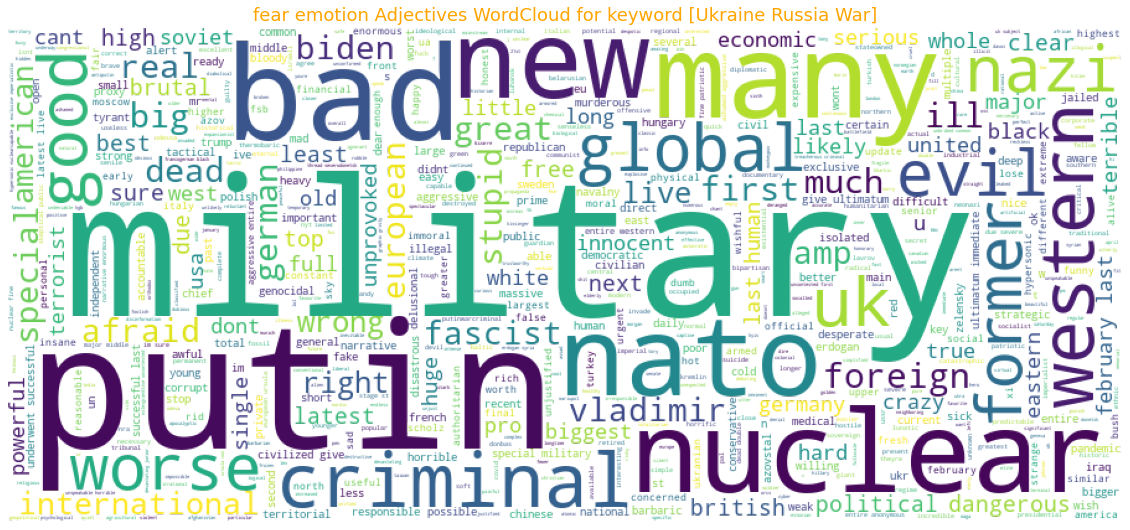

In [49]:
Visulization.creatNGramsChart(tweets_putin,'fear', title='fear Bigrams', n =2)
Visulization.creatNGramsChart(tweets_putin,'fear', title='fear Trigrams', n =3)
Visulization.createWordCloudForEmotion(tweets_putin,'fear','nouns','fear emotion Nones WordCloud for keyword [Ukraine Russia War]')
Visulization.createWordCloudForEmotion(tweets_putin,'fear','adjectives','fear emotion Adjectives WordCloud for keyword [Ukraine Russia War]')

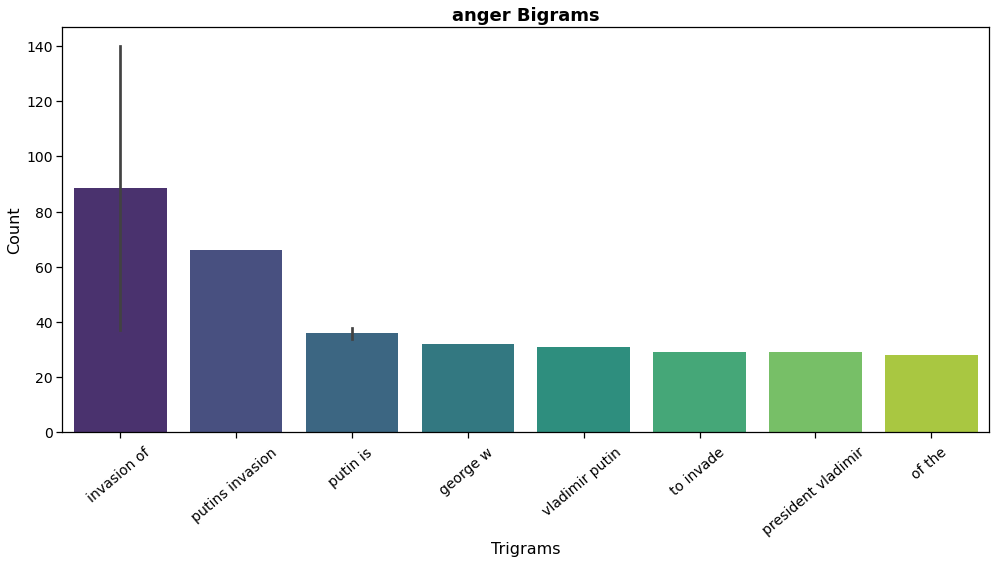

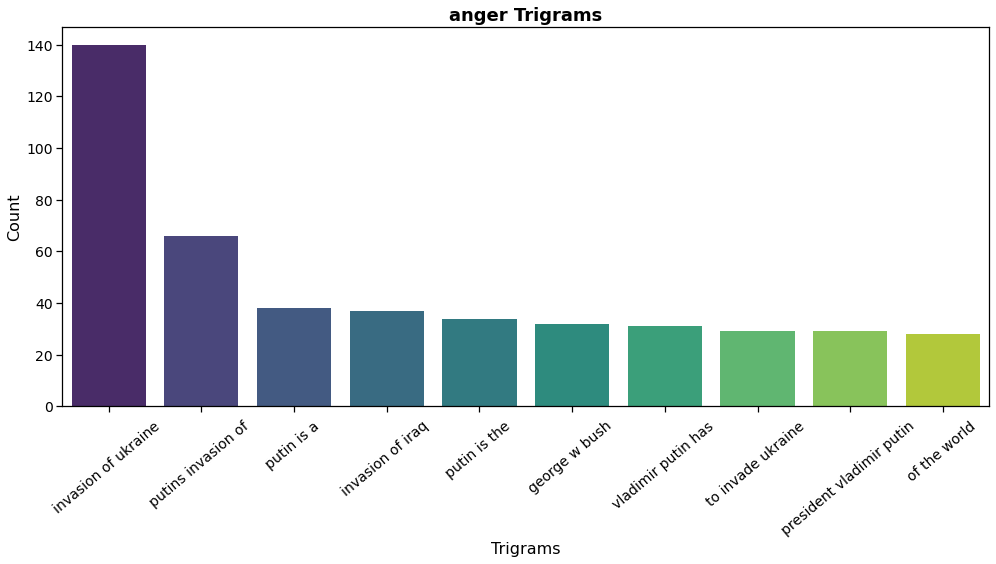

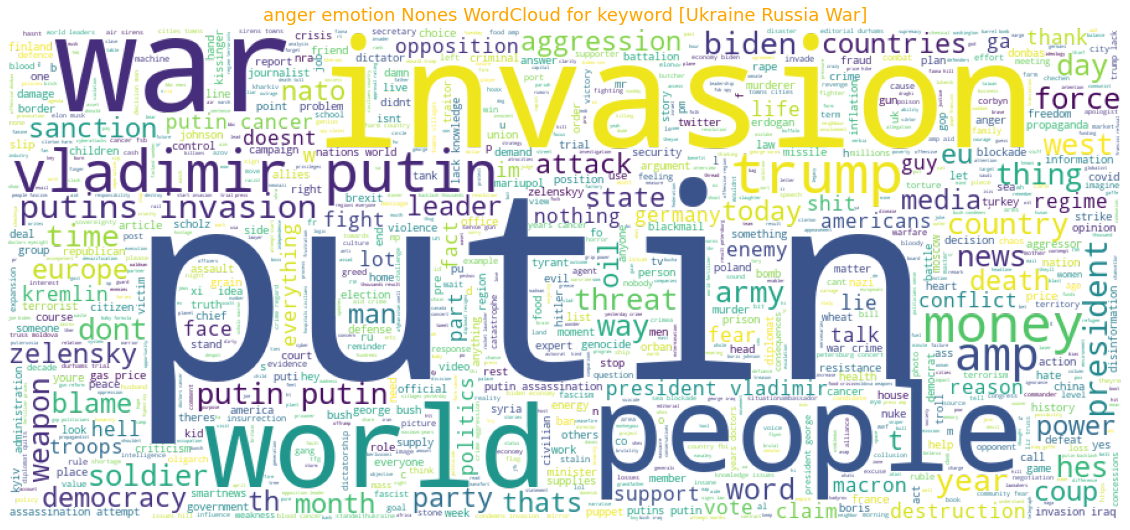

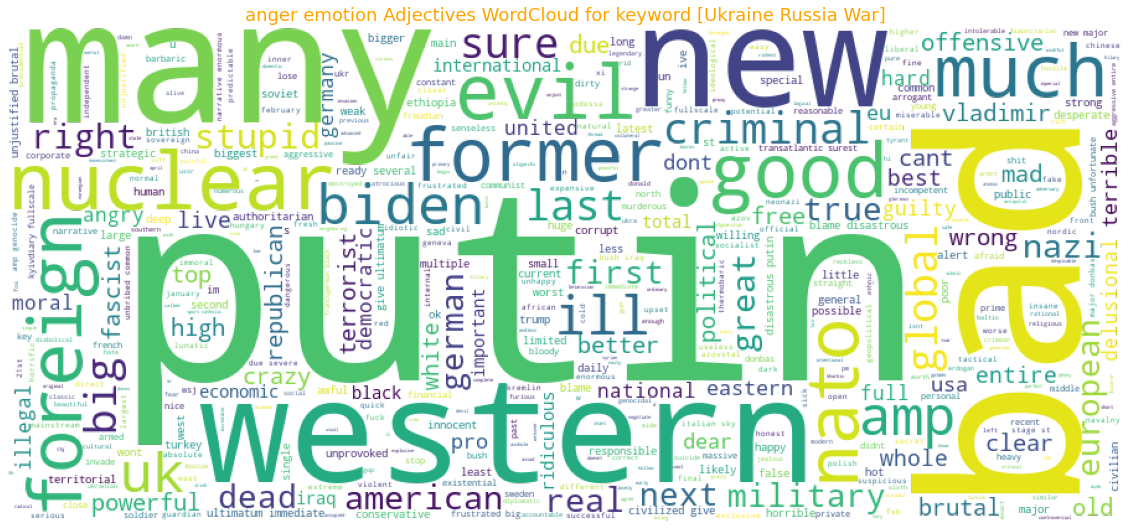

In [50]:
Visulization.creatNGramsChart(tweets_putin,'anger', title='anger Bigrams', n =2)
Visulization.creatNGramsChart(tweets_putin,'anger', title='anger Trigrams', n =3)
Visulization.createWordCloudForEmotion(tweets_putin,'anger','nouns','anger emotion Nones WordCloud for keyword [Ukraine Russia War]')
Visulization.createWordCloudForEmotion(tweets_putin,'anger','adjectives','anger emotion Adjectives WordCloud for keyword [Ukraine Russia War]')


# Keyword: Zelensky

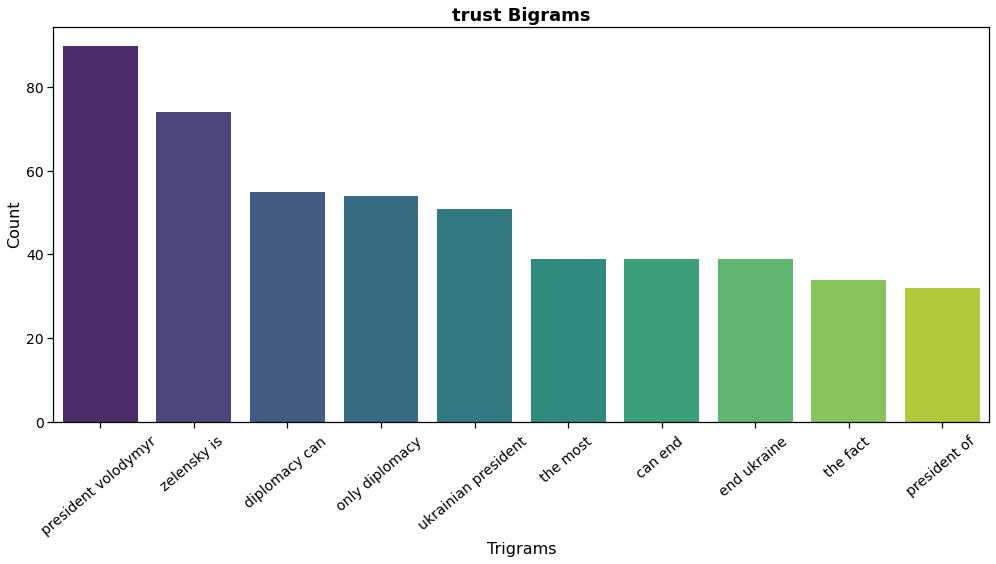

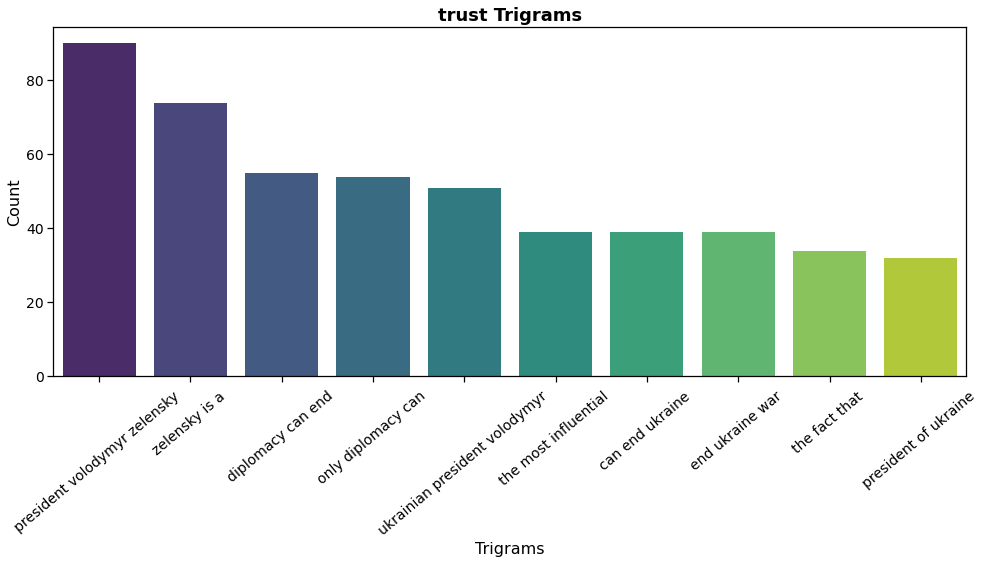

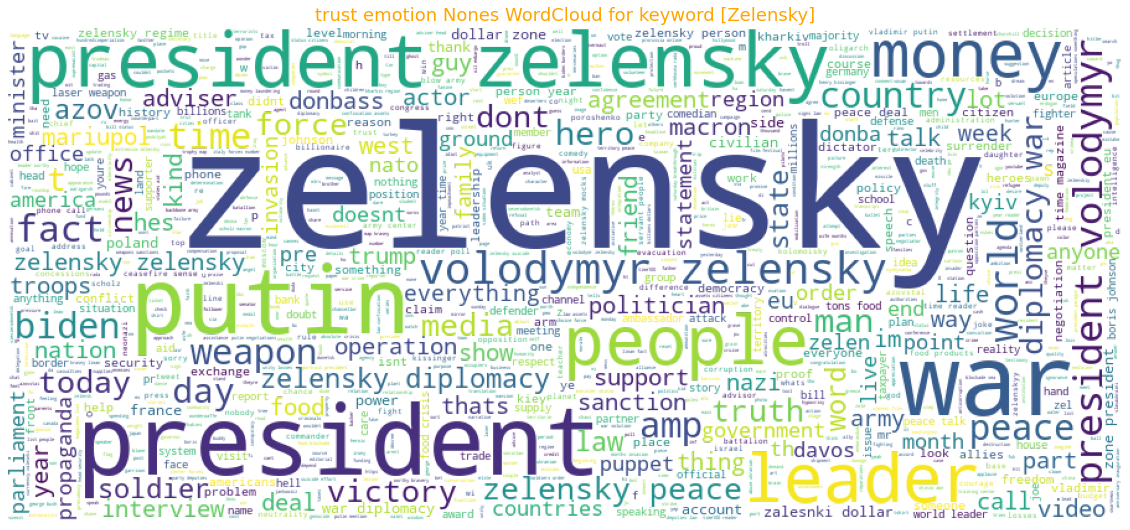

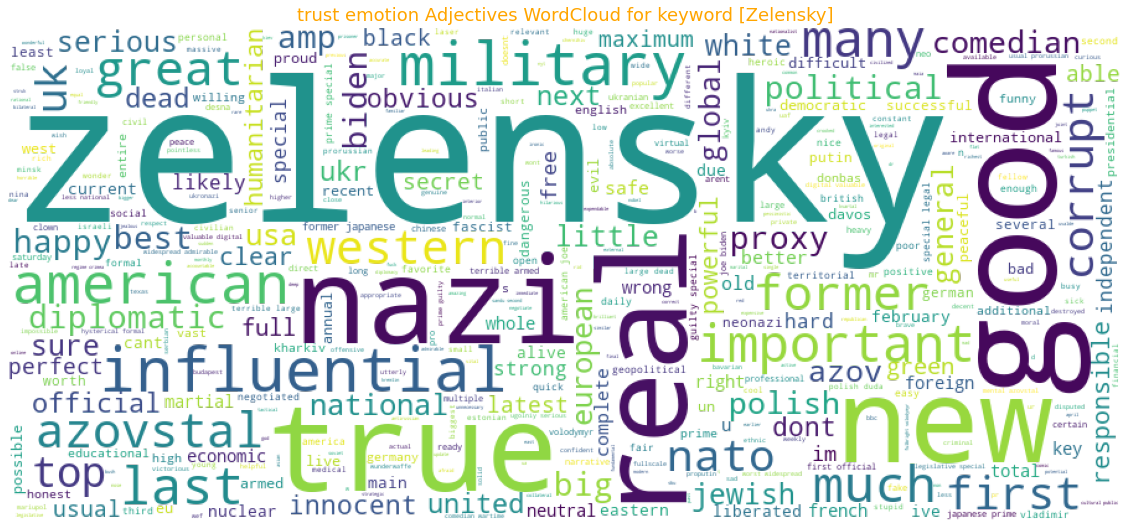

In [60]:


Keyword = 'Zelensky'
emotion = 'trust'
Visulization.creatNGramsChart(dict[Keyword],emotion, title=f'{emotion} Bigrams', n =2)
Visulization.creatNGramsChart(dict[Keyword],emotion, title=f'{emotion} Trigrams', n =3)
Visulization.createWordCloudForEmotion(dict[Keyword],emotion,'nouns',f'{emotion} emotion Nones WordCloud for keyword [{Keyword}]')
Visulization.createWordCloudForEmotion(dict[Keyword],emotion,'adjectives',f'{emotion} emotion Adjectives WordCloud for keyword [{Keyword}]')

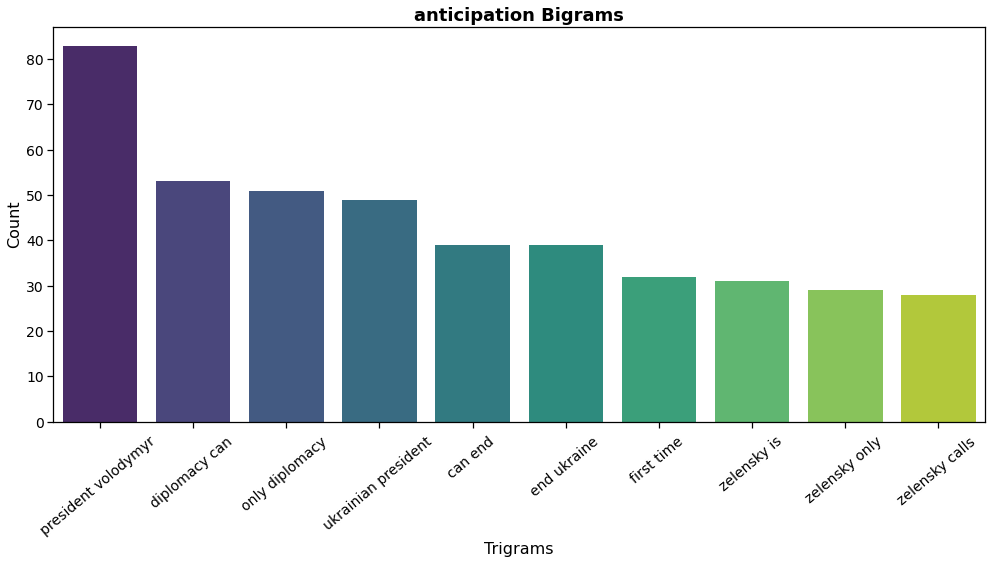

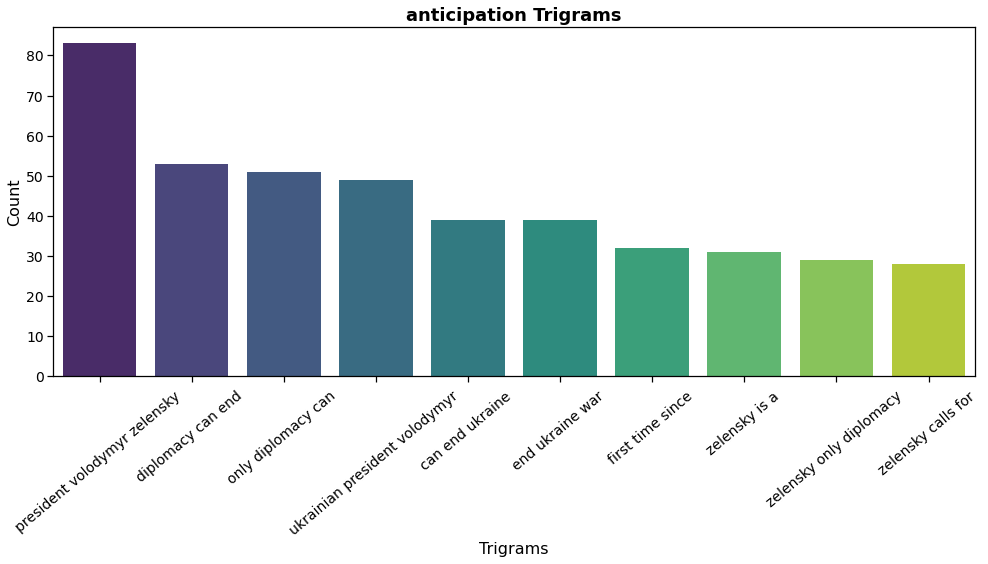

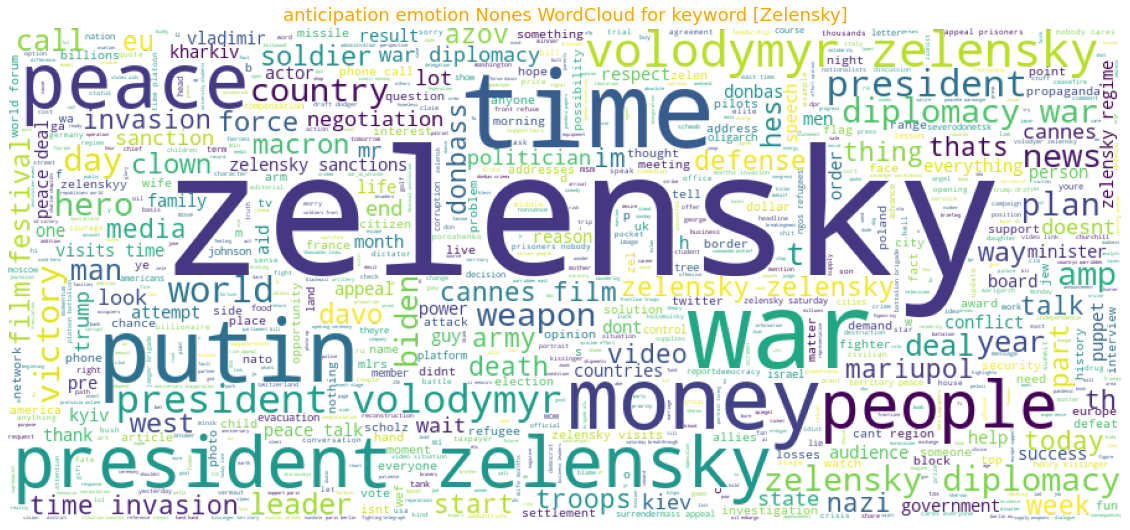

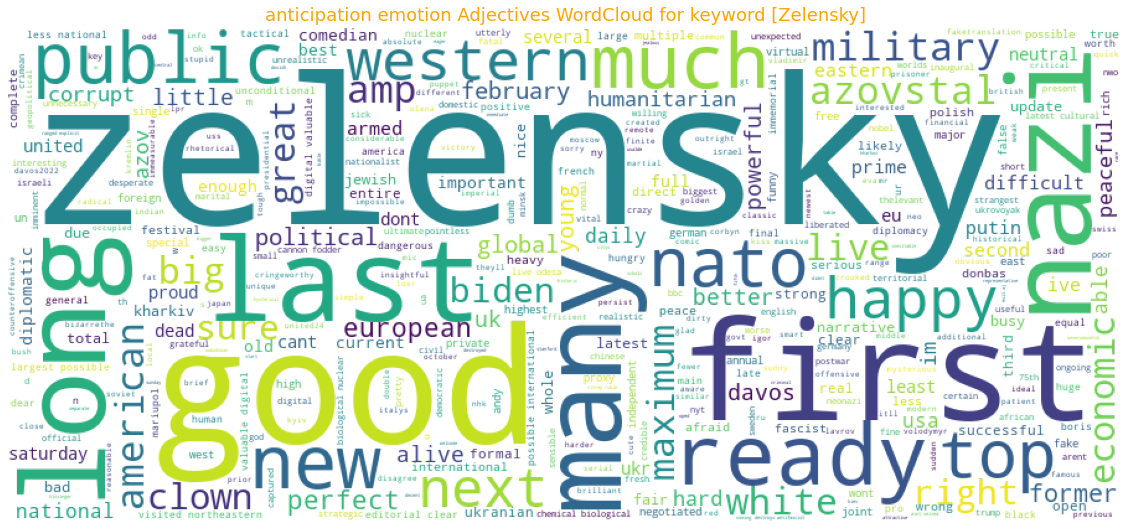

In [62]:
emotion = 'anticipation'
Visulization.creatNGramsChart(dict[Keyword],emotion, title=f'{emotion} Bigrams', n =2)
Visulization.creatNGramsChart(dict[Keyword],emotion, title=f'{emotion} Trigrams', n =3)
Visulization.createWordCloudForEmotion(dict[Keyword],emotion,'nouns',f'{emotion} emotion Nones WordCloud for keyword [{Keyword}]')
Visulization.createWordCloudForEmotion(dict[Keyword],emotion,'adjectives',f'{emotion} emotion Adjectives WordCloud for keyword [{Keyword}]')

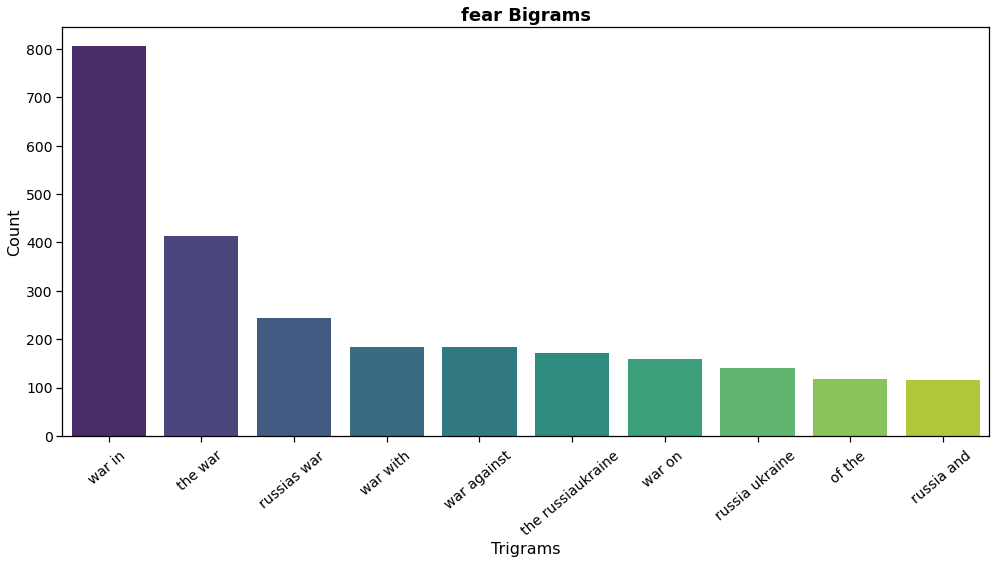

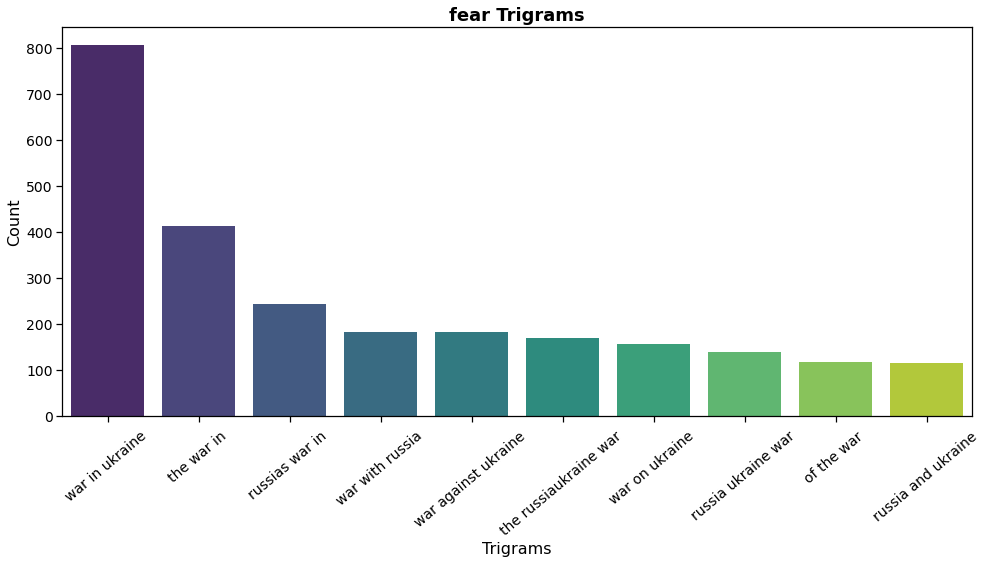

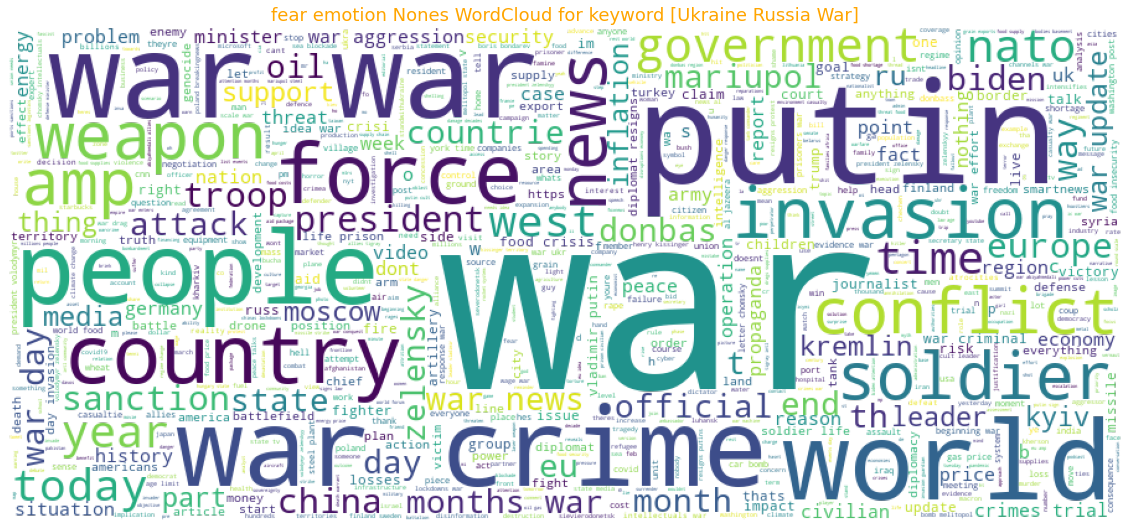

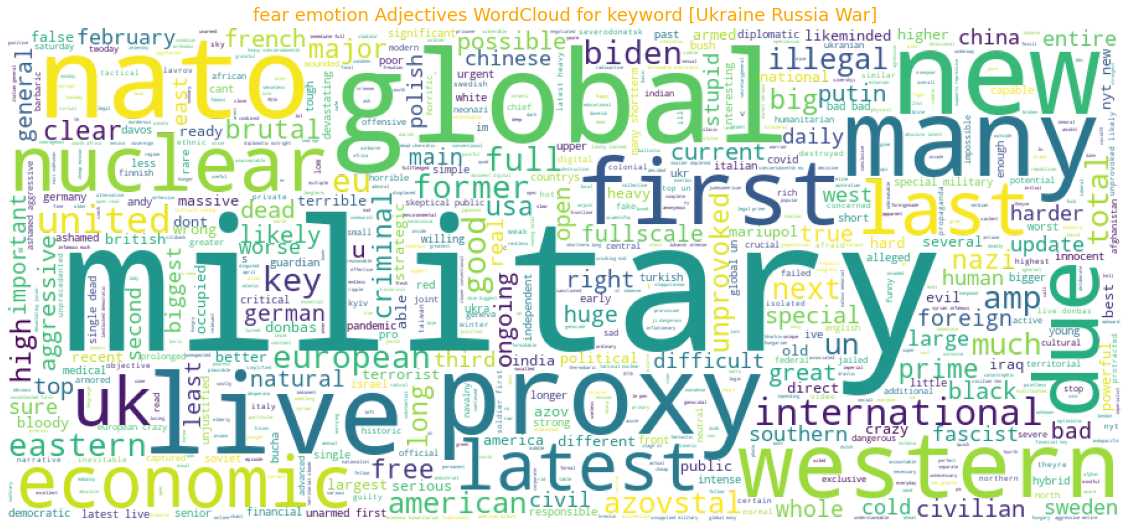

In [63]:
# Keyword: Ukraine Russia War


Keyword = 'Ukraine Russia War'
emotion = 'fear'
Visulization.creatNGramsChart(dict[Keyword],emotion, title=f'{emotion} Bigrams', n =2)
Visulization.creatNGramsChart(dict[Keyword],emotion, title=f'{emotion} Trigrams', n =3)
Visulization.createWordCloudForEmotion(dict[Keyword],emotion,'nouns',f'{emotion} emotion Nones WordCloud for keyword [{Keyword}]')
Visulization.createWordCloudForEmotion(dict[Keyword],emotion,'adjectives',f'{emotion} emotion Adjectives WordCloud for keyword [{Keyword}]')

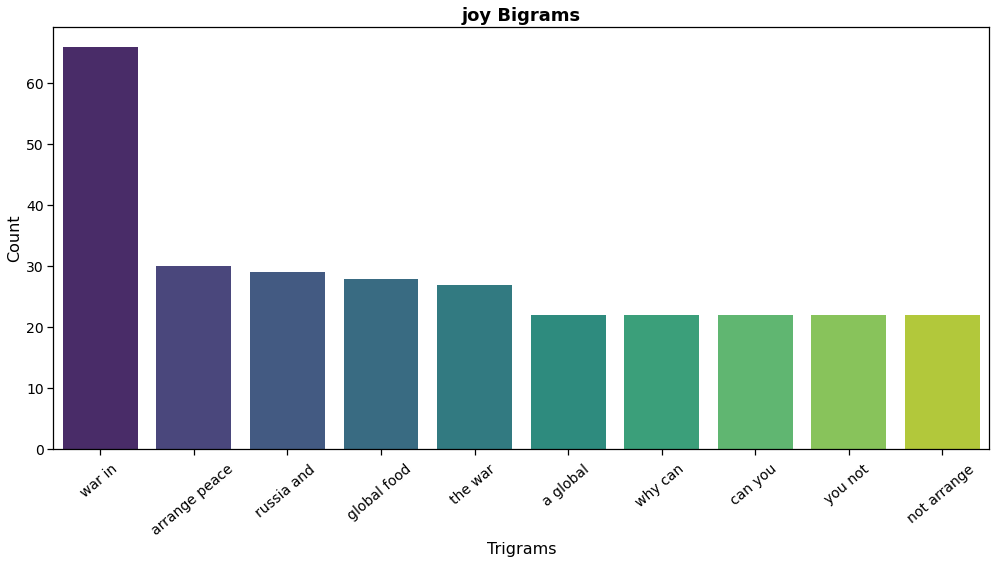

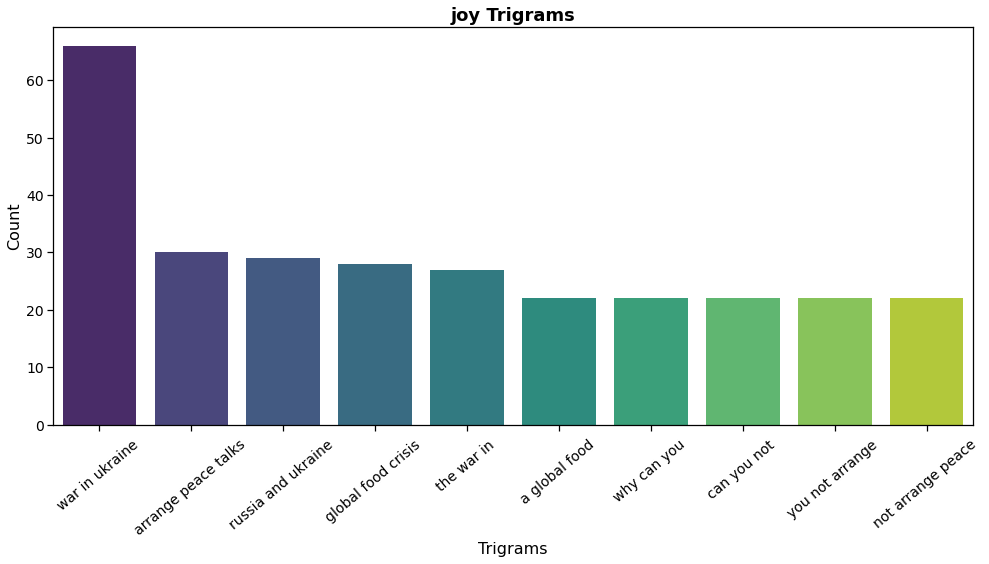

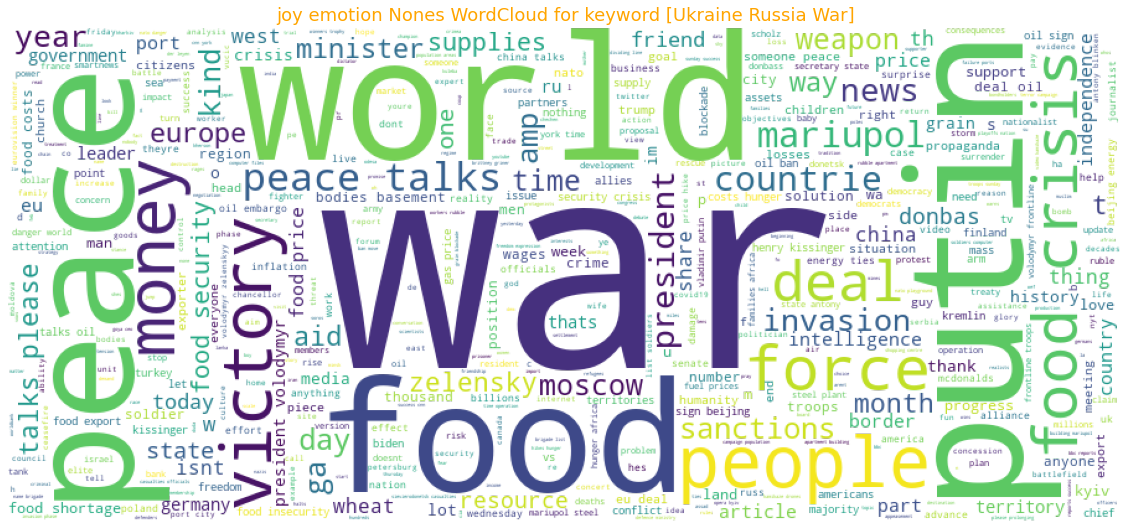

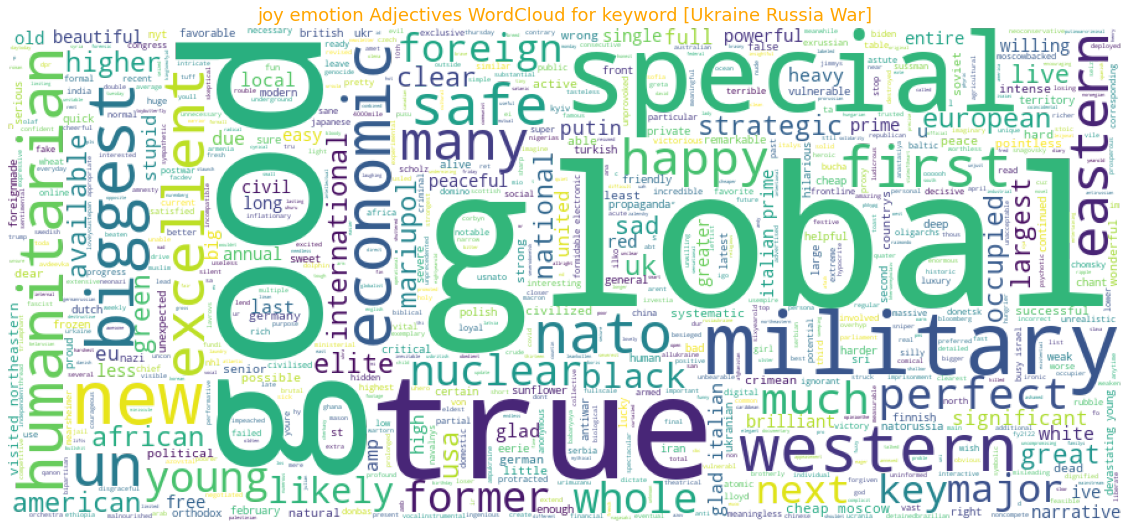

In [64]:
# Keyword: Ukraine Russia War


Keyword = 'Ukraine Russia War'
emotion = 'joy'
Visulization.creatNGramsChart(dict[Keyword],emotion, title=f'{emotion} Bigrams', n =2)
Visulization.creatNGramsChart(dict[Keyword],emotion, title=f'{emotion} Trigrams', n =3)
Visulization.createWordCloudForEmotion(dict[Keyword],emotion,'nouns',f'{emotion} emotion Nones WordCloud for keyword [{Keyword}]')
Visulization.createWordCloudForEmotion(dict[Keyword],emotion,'adjectives',f'{emotion} emotion Adjectives WordCloud for keyword [{Keyword}]')

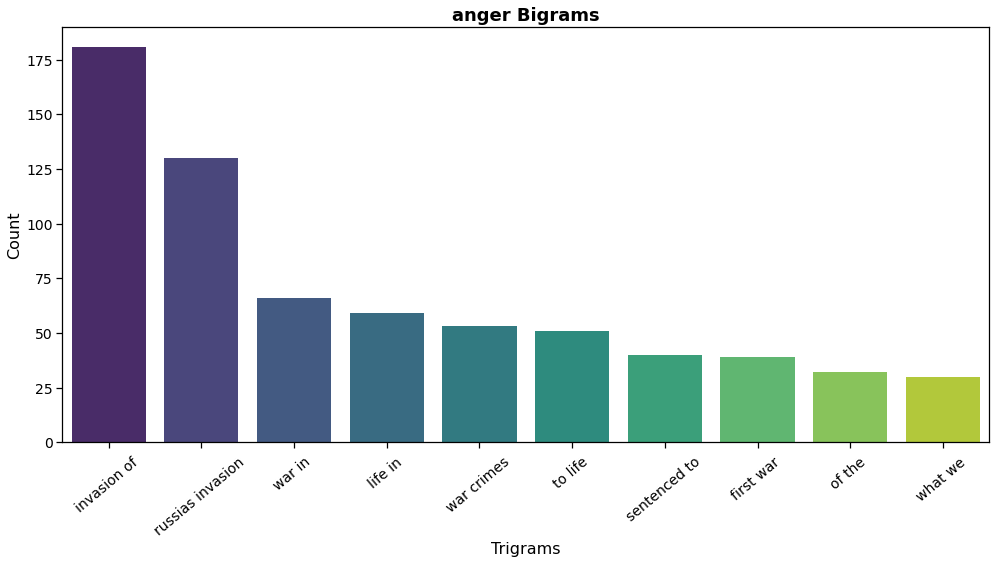

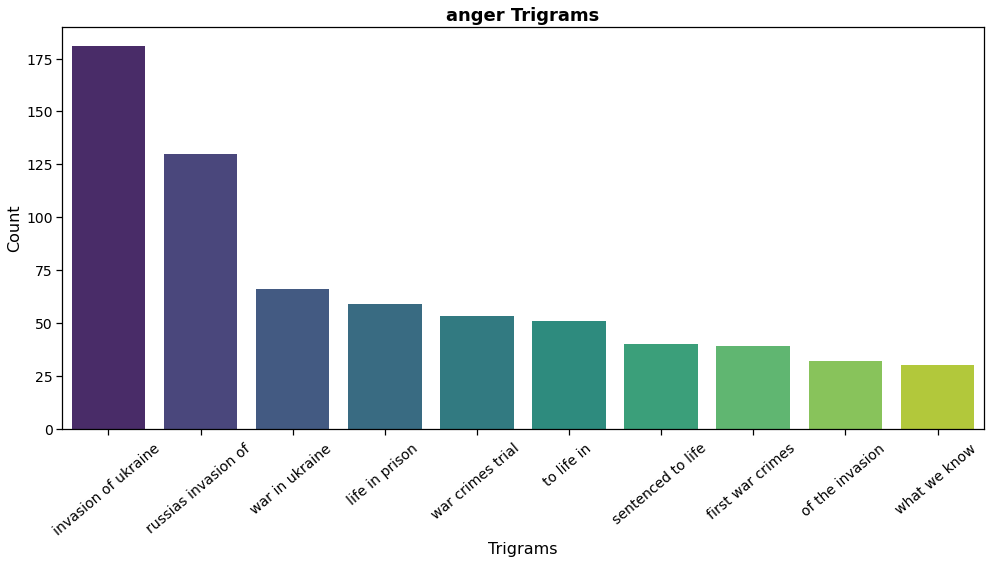

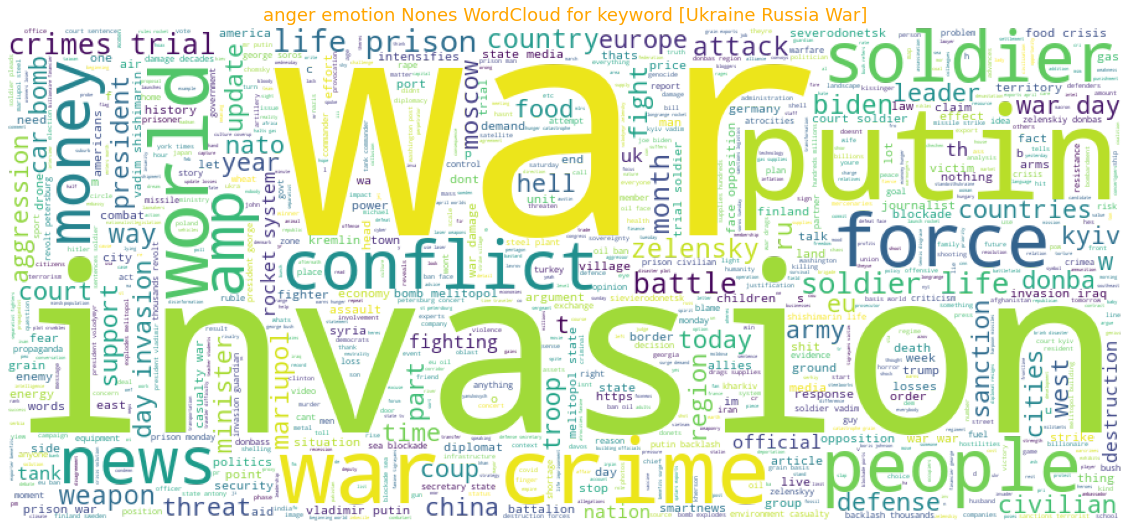

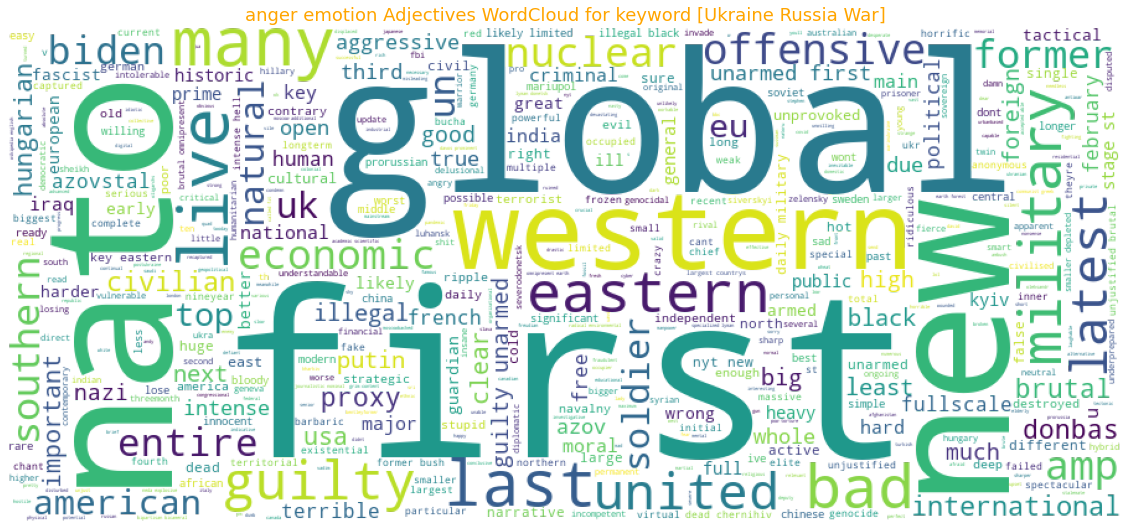

In [66]:
# Keyword: Ukraine Russia War


Keyword = 'Ukraine Russia War'
emotion = 'anger'
Visulization.creatNGramsChart(dict[Keyword],emotion, title=f'{emotion} Bigrams', n =2)
Visulization.creatNGramsChart(dict[Keyword],emotion, title=f'{emotion} Trigrams', n =3)
Visulization.createWordCloudForEmotion(dict[Keyword],emotion,'nouns',f'{emotion} emotion Nones WordCloud for keyword [{Keyword}]')
Visulization.createWordCloudForEmotion(dict[Keyword],emotion,'adjectives',f'{emotion} emotion Adjectives WordCloud for keyword [{Keyword}]')